## Housing prediction using XGB 

In [133]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

In [134]:
housing_df = pd.read_csv('housing.csv')
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Visualization

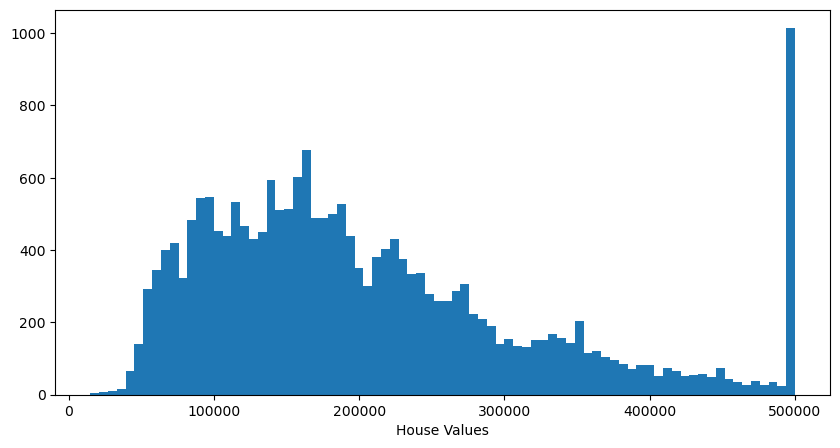

In [135]:
plt.hist(housing_df['median_house_value'],bins = 80)
plt.xlabel("House Values")
plt.show()

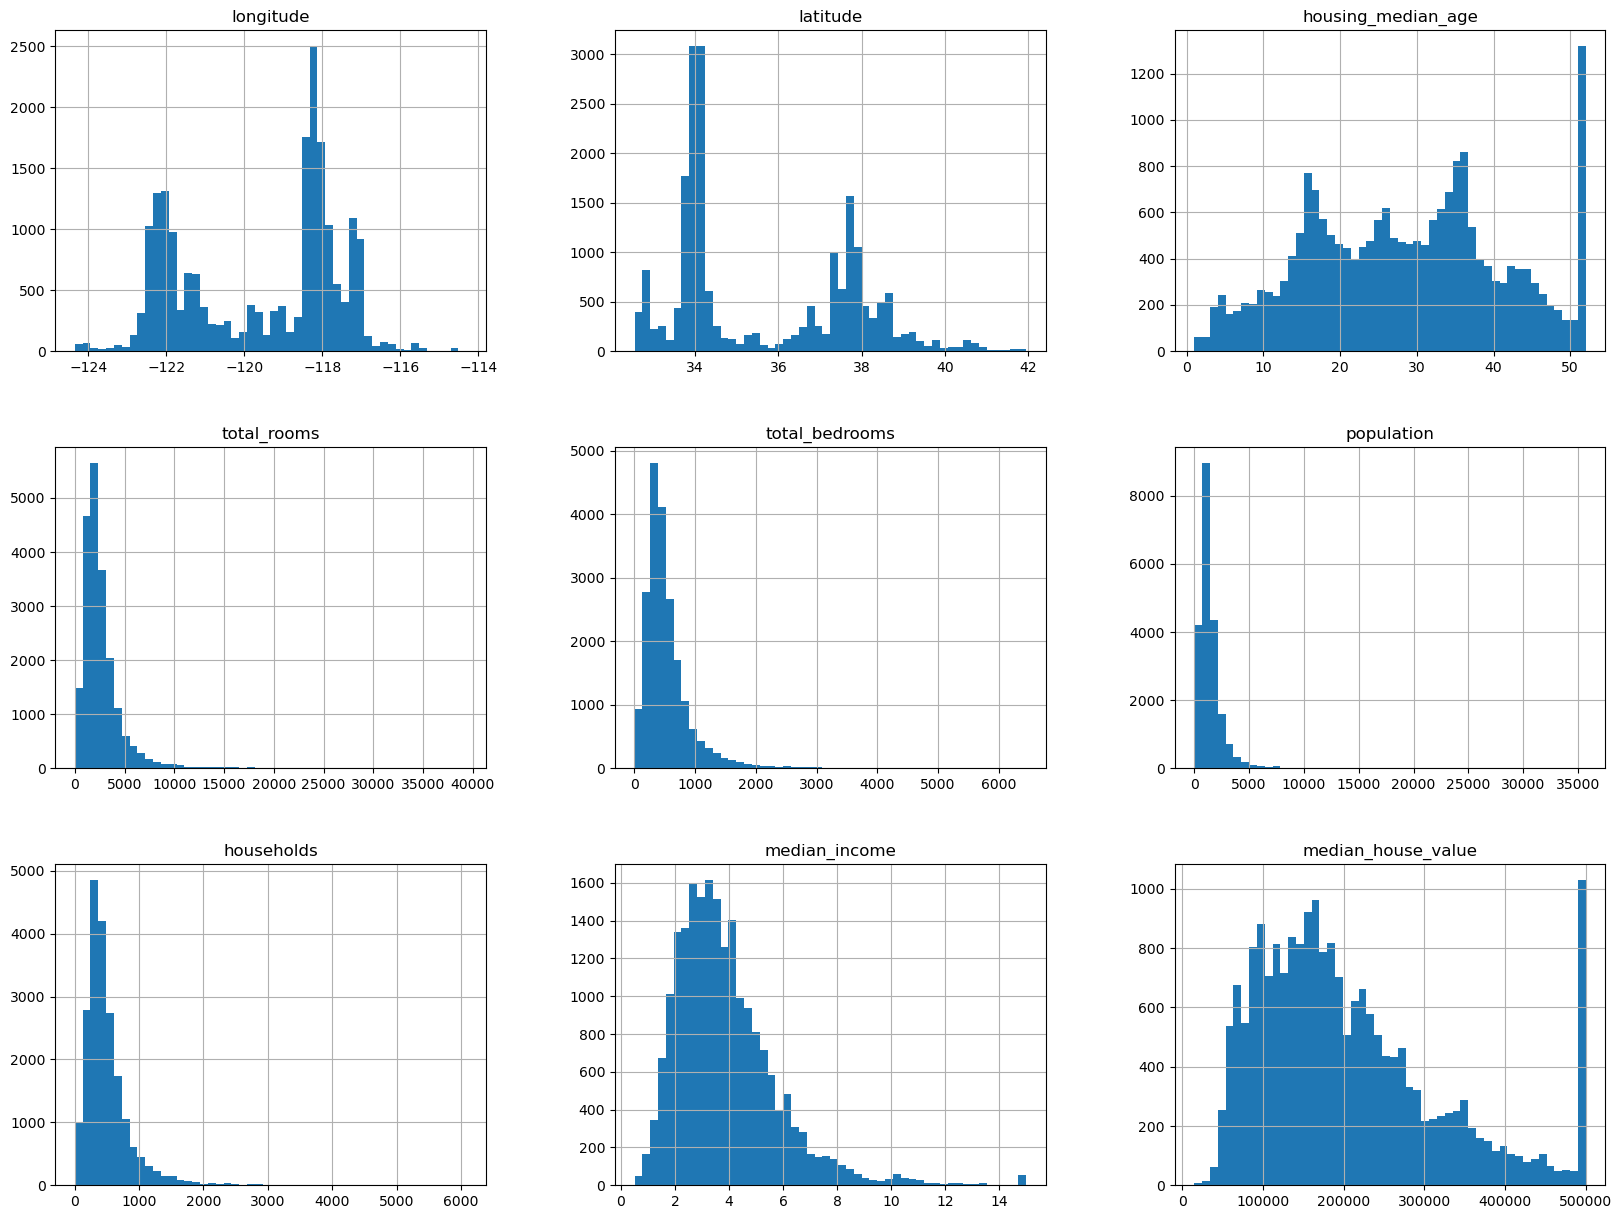

In [136]:
housing_df.hist(bins =50, figsize=(20,15))
plt.show()

In [ ]:

numeric_columns = housing_df.select_dtypes(include=['float64', 'int64']).columns
corr = housing_df[numeric_columns].corr()
print(corr)



                    longitude  latitude  housing_median_age  total_rooms  \
longitude                1.00     -0.92               -0.11         0.04   
latitude                -0.92      1.00                0.01        -0.04   
housing_median_age      -0.11      0.01                1.00        -0.36   
total_rooms              0.04     -0.04               -0.36         1.00   
total_bedrooms           0.07     -0.07               -0.32         0.93   
population               0.10     -0.11               -0.30         0.86   
households               0.06     -0.07               -0.30         0.92   
median_income           -0.02     -0.08               -0.12         0.20   
median_house_value      -0.05     -0.14                0.11         0.13   

                    total_bedrooms  population  households  median_income  \
longitude                     0.07        0.10        0.06          -0.02   
latitude                     -0.07       -0.11       -0.07          -0.08   
housing_

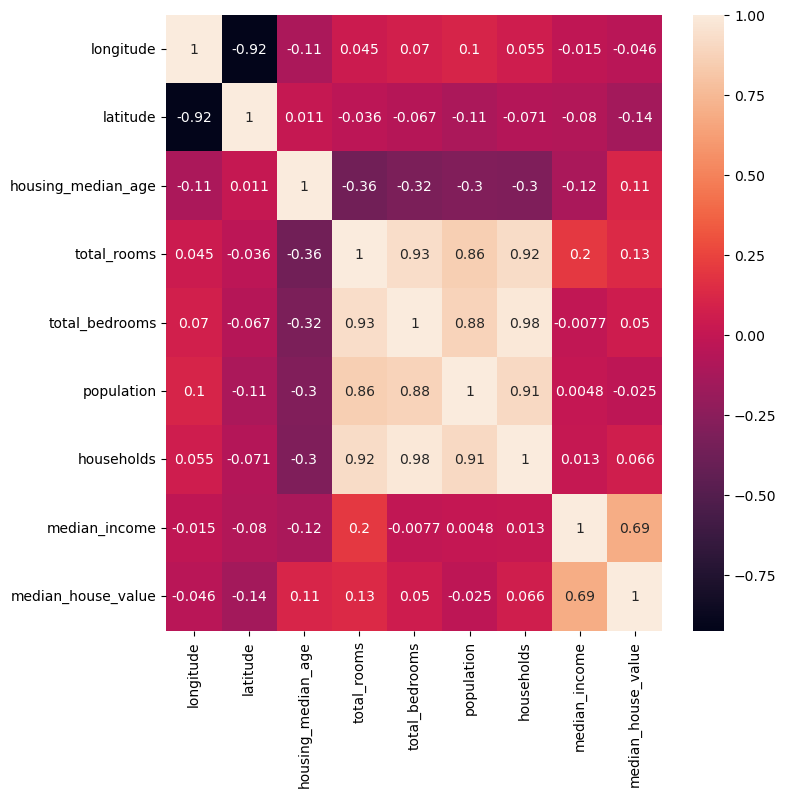

In [138]:
plt.figure(figsize =(8,8))

sns.heatmap(corr,annot =True)
plt.show()

# Feature Engineering

In [139]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [140]:
housing_df['total_bedrooms'].isnull().sum()/housing_df.shape[0]*100

np.float64(1.002906976744186)

## Why is Imputation Important? for Missing Data
Avoids data loss: Instead of simply deleting rows or columns with missing values (which can lead to a significant reduction in your dataset size, especially if there's a lot of missing data), imputation allows you to retain more information.

Prevents bias: If missing data is not random, simply deleting it can introduce bias into your analysis. Imputation aims to fill in these gaps in a way that minimizes such bias.


Enables machine learning models: Most machine learning algorithms cannot handle missing values directly, so imputation makes the dataset suitable for model training.

Improves analytical accuracy: By providing a more complete dataset, imputation can lead to more robust and reliable statistical analyses and model predictions.

In [141]:
# Assistant
from sklearn.impute import KNNImputer  # Corrected capitalization from kNNImputer to KNNImputer

# create a temporary copy of the dataset
housing_df_temp = housing_df.copy()

# retrieve columns with numerical data; will exclude the ocean_proximity column since the datatype is object; other columns are float64
columns_list = [col for col in housing_df_temp.columns if housing_df_temp[col].dtype != 'object']

# extract columns that contain at least one missing value
new_column_list = [col for col in housing_df_temp.loc[:, housing_df_temp.isnull().any()]]

# update temp dataframe with numeric columns that have empty values
housing_df_temp = housing_df_temp[new_column_list]

In [142]:
# initialize KNNImputer to impute missing data using machine learning
knn = KNNImputer(n_neighbors = 3)

# fit function trains the model 
knn.fit(housing_df_temp)

# transform the data using the model
# applies the transformation model (ie knn) to data
array_Values = knn.transform(housing_df_temp)

# convert the array values to a dataframe with the appropriate column names
housing_df_temp = pd.DataFrame(array_Values, columns = new_column_list)
housing_df_temp.isnull().sum()

total_bedrooms    0
dtype: int64

In [143]:
for column_name in new_column_list:
    housing_df[column_name] = housing_df_temp[column_name]

housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## combining higliy co related variables 

In [144]:
#  a new feature that is a ratio of the total rooms to households
housing_df['rooms_per_household'] = housing_df['total_rooms']/housing_df['households']

# a new feature that is a ratio of the total bedrooms to the total rooms 
housing_df['bedrooms_per_room'] = housing_df['total_bedrooms']/housing_df['total_rooms']

# a new feature that is a ratio of the population to the households 
housing_df['population_per_household']= housing_df['population']/housing_df['households']

# let's combine the latitude and longitude into 1
housing_df['coords'] = housing_df['longitude']/housing_df['latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

In [145]:
column_to_drop = ['total_rooms', 'households', 'total_bedrooms', 
                   'population', 'longitude', 'latitude']

housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   longitude                 20640 non-null  float64
 1   latitude                  20640 non-null  float64
 2   housing_median_age        20640 non-null  float64
 3   total_rooms               20640 non-null  float64
 4   total_bedrooms            20640 non-null  float64
 5   population                20640 non-null  float64
 6   households                20640 non-null  float64
 7   median_income             20640 non-null  float64
 8   median_house_value        20640 non-null  float64
 9   ocean_proximity           20640 non-null  object 
 10  rooms_per_household       20640 non-null  float64
 11  bedrooms_per_room         20640 non-null  float64
 12  population_per_household  20640 non-null  float64
 13  coords                    20640 non-null  float64
dtypes: flo

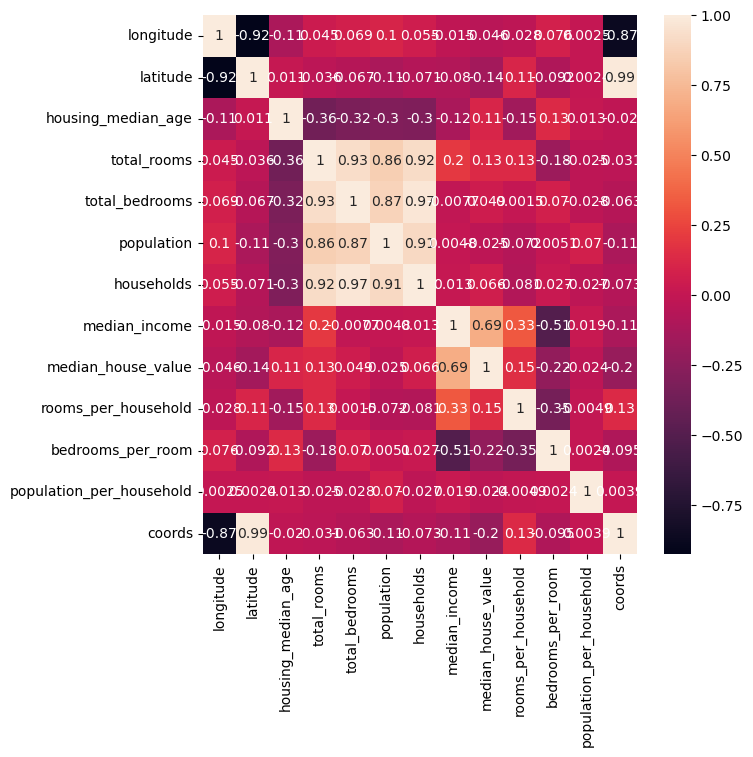

In [146]:
corr = housing_df.corr(numeric_only=True) 

#make the heatmap larger in size
plt.figure(figsize = (7,7))

sns.heatmap(corr, annot=True)
plt.show()

## Encoding Data for ocean proximity

In [147]:
housing_df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [148]:
#count
housing_df["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

## One HOT encoding 

In [149]:
print(pd.get_dummies(housing_df['ocean_proximity']))

       <1H OCEAN  INLAND  ISLAND  NEAR BAY  NEAR OCEAN
0          False   False   False      True       False
1          False   False   False      True       False
2          False   False   False      True       False
3          False   False   False      True       False
4          False   False   False      True       False
...          ...     ...     ...       ...         ...
20635      False    True   False     False       False
20636      False    True   False     False       False
20637      False    True   False     False       False
20638      False    True   False     False       False
20639      False    True   False     False       False

[20640 rows x 5 columns]


In [150]:
housing_df_encoded = pd.get_dummies(data=housing_df, columns=['ocean_proximity'])

# print the first few observations; notice the old OCEAN_PROXIMITY column is gone
housing_df_encoded.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,coords,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.00,880.00,129.00,322.00,126.00,8.33,452600.00,6.98,0.15,2.56,-3.23,False,False,False,True,False
1,-122.22,37.86,21.00,7099.00,1106.00,2401.00,1138.00,8.30,358500.00,6.24,0.16,2.11,-3.23,False,False,False,True,False
2,-122.24,37.85,52.00,1467.00,190.00,496.00,177.00,7.26,352100.00,8.29,0.13,2.80,-3.23,False,False,False,True,False
3,-122.25,37.85,52.00,1274.00,235.00,558.00,219.00,5.64,341300.00,5.82,0.18,2.55,-3.23,False,False,False,True,False
4,-122.25,37.85,52.00,1627.00,280.00,565.00,259.00,3.85,342200.00,6.28,0.17,2.18,-3.23,False,False,False,True,False


## Training the model

In [151]:

import sklearn
from sklearn.model_selection import train_test_split

# remove spaces from column names and convert all to lowercase and remove special characters as it could cause issues in the future
housing_df_encoded.columns = [c.lower().replace(' ', '_').replace('<', '_') for c in housing_df_encoded.columns]

# Split target variable and feature variables
X = housing_df_encoded[['housing_median_age', 'median_income','bedrooms_per_room','population_per_household','coords','ocean_proximity__1h_ocean',
                        'ocean_proximity_inland','ocean_proximity_island','ocean_proximity_near_bay','ocean_proximity_near_ocean']]
y = housing_df_encoded['median_house_value']

print(X)

       housing_median_age  median_income  bedrooms_per_room  \
0                   41.00           8.33               0.15   
1                   21.00           8.30               0.16   
2                   52.00           7.26               0.13   
3                   52.00           5.64               0.18   
4                   52.00           3.85               0.17   
...                   ...            ...                ...   
20635               25.00           1.56               0.22   
20636               18.00           2.56               0.22   
20637               17.00           1.70               0.22   
20638               18.00           1.87               0.22   
20639               16.00           2.39               0.22   

       population_per_household  coords  ocean_proximity__1h_ocean  \
0                          2.56   -3.23                      False   
1                          2.11   -3.23                      False   
2                          2.80  

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 0, shuffle=True, test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 10)
(4128, 10)
(16512,)
(4128,)


## Check the model

In [153]:
pip install lazypredict

In [154]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, random_state=42)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
print("\n--- LazyRegressor Model Performance ---")
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000730 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1073
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 5
[LightGBM] [Info] Start training from score 207249.895894

--- LazyRegressor Model Performance ---
                               Adjusted R-Squared  R-Squared        RMSE  \
Model                                                                      
LGBMRegressor                                0.75       0.75    57127.32   
HistGradientBoostingRegressor                0.75       0.75    57357.04   
XGBRegressor                                 0.74       0.74    57924.79   
RandomForestRegressor                        0.74       0.74    58313.40   
ExtraTreesRegressor                          0.73       0.73    59677.15   
BaggingRegressor                             0.72       0.72    60412.43   
Gradi

In [155]:
## AS per the list LGBMRegressor is the top model    
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
#run the predictions on the training and testing data
xgb_model.fit(X_train, y_train)
y_xgb_pred_test = xgb_model.predict(X_test)

In [156]:
#compare the actual values (ie, target) with the values predicted by the model
xgb_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_pred_test})

xgb_pred_test_df

,Actual,Predicted
14740,136900.00,148806.61
10101,241300.00,268927.34
20566,200700.00,123908.44
2670,72500.00,195006.14
15709,460000.00,418308.06
...,...,...
6655,169500.00,181379.69
3505,204600.00,209012.58
1919,128600.00,114307.94
1450,259500.00,236434.45


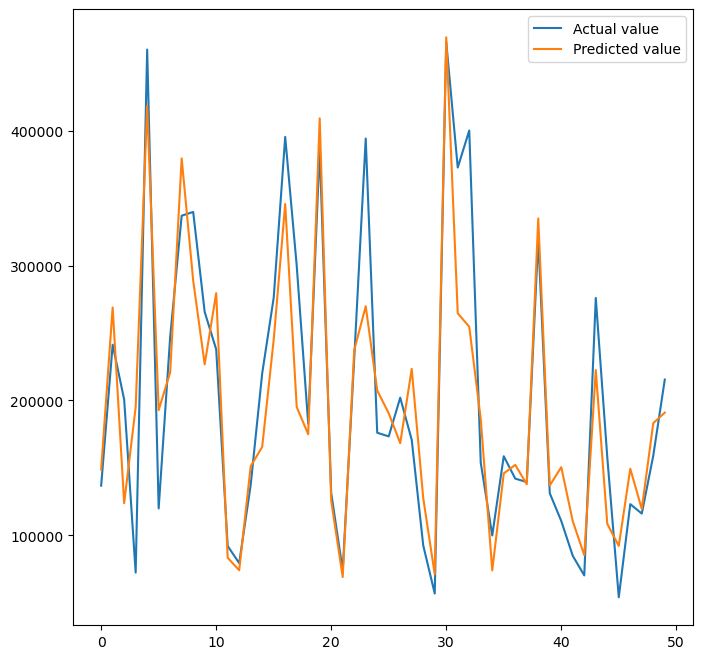

In [157]:
fig= plt.figure(figsize=(8,8))
xgb_pred_test_df = xgb_pred_test_df.reset_index()
xgb_pred_test_df = xgb_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])
plt.show()

## Loss Function Evaluation Metrics 

In [158]:
xgb_model.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'feature_weights': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [159]:
xgb_model_2 = XGBRegressor(
    gamma=0.05,
    learning_rate=0.01,
    max_depth=6,
    n_estimators=1000,
    n_jobs=16,
    objective='reg:squarederror',
    subsample=0.8,
    scale_pos_weight=0,
    reg_alpha=0,
    reg_lambda=1,
    verbosity=1)

xgb_model_2.fit(X_train, y_train)


#run the predictions on the training and testing data
y_xgb_2_pred_test = xgb_model_2.predict(X_test)

In [160]:

# compare the actual values (ie, target) with the values predicted by the model
xgb_2_pred_test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_xgb_2_pred_test})

xgb_2_pred_test_df

,Actual,Predicted
14740,136900.00,140384.36
10101,241300.00,283094.50
20566,200700.00,135390.44
2670,72500.00,135436.81
15709,460000.00,432173.09
...,...,...
6655,169500.00,176062.70
3505,204600.00,211619.89
1919,128600.00,128705.13
1450,259500.00,232926.94


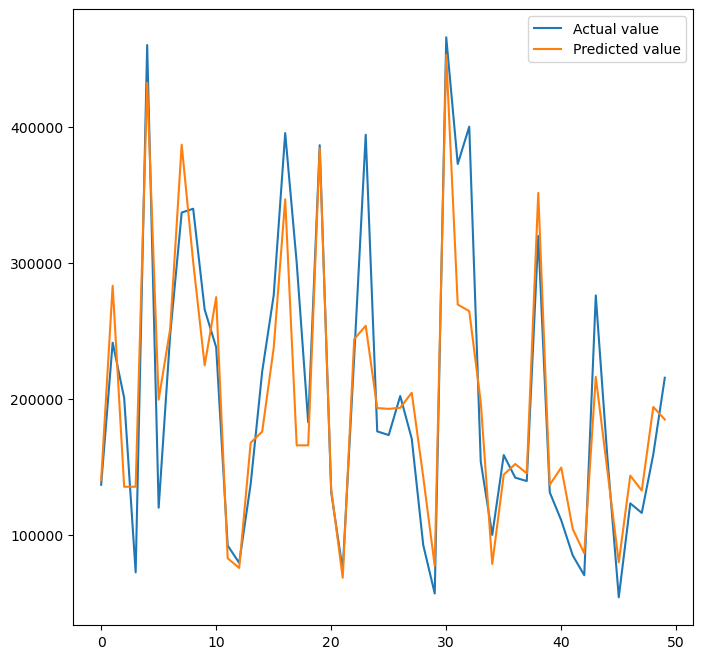

In [161]:

fig= plt.figure(figsize=(8,8))
xgb_2_pred_test_df = xgb_2_pred_test_df.reset_index()
xgb_2_pred_test_df = xgb_2_pred_test_df.drop(['index'],axis=1)
plt.plot(xgb_2_pred_test_df[:50])
plt.legend(['Actual value','Predicted value'])
plt.show()


In [162]:
# Determine accuracy uisng 𝑅^2
r2_xgb_model_2_test = round(xgb_model_2.score(X_test, y_test),2)

print("R^2 Test: {}".format(r2_xgb_model_2_test))

R^2 Test: 0.79


## Machine learning Pipeline

In [166]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

pipeline_lr= Pipeline([('lr_classifier', LinearRegression())])
pipeline_xgb = Pipeline([('xgb_classifier', XGBRegressor())]) 

pipelines = [pipeline_lr, pipeline_xgb]
pipe_dict = {0: 'Linear Regression', 1: 'XGBRegressor'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

for i,model in enumerate(pipelines):
    pred_test = model.predict(X_test)
    if i == 1: rf_model = model
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(X_test,y_test)))
    print(pd.DataFrame({'Actual': y_test, 'Predicted': pred_test}))

Linear Regression Test Accuracy:0.5915108143243775
         Actual  Predicted
14740 136900.00  243837.66
10101 241300.00  296592.11
20566 200700.00  172411.31
2670   72500.00  114826.56
15709 460000.00  285669.30
...         ...        ...
6655  169500.00  178329.13
3505  204600.00  247689.44
1919  128600.00  112695.50
1450  259500.00  232049.55
4148  167600.00  231077.30

[4128 rows x 2 columns]
XGBRegressor Test Accuracy:0.7822882178375349
         Actual  Predicted
14740 136900.00  148806.61
10101 241300.00  268927.34
20566 200700.00  123908.44
2670   72500.00  195006.14
15709 460000.00  418308.06
...         ...        ...
6655  169500.00  181379.69
3505  204600.00  209012.58
1919  128600.00  114307.94
1450  259500.00  236434.45
4148  167600.00  173328.58

[4128 rows x 2 columns]
